# Part 1: Clustering the Online Retail Data

In [71]:
### IMPORTS ###
#Clustering
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('online_shoppers_intention.csv')

In [50]:
# checking the shape of the data
df.shape

(12330, 18)

In [51]:
# describing the data

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [52]:
# checking the datatypes of the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

## Task 1. Data Preparation for Clustering

### 1. Can you identify data quality issues in this dataset such as unusual data types,missing values, etc?

In [53]:
# find the missing data for all features
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
Weekend                     0
Revenue                     0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
PageValues                  0
dtype: int64


#### missing value

As seen above, 14 rows in the dataset contain missing values for ExiteRates, BounceRates, ProductRelated_Duration, Information_Duration, Administrative_Duration, ProductRelated, Informational, Administrative. 

In [54]:
df=df.dropna(subset=['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates'])
MissingData_afterDrop = df.isnull().sum()
print(MissingData_afterDrop.sort_values(ascending = False))

Revenue                    0
Weekend                    0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Administrative             0
dtype: int64


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

In [56]:
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].unique())
        print(df[cols].value_counts())
        print("-"*20)
        
describeDataset(df)

[ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. 24. 22. 21. 20. 23. 27. 26.]
0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
--------------------
[  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
 0.000000      5857
 4.000000        56
 5.000000        53
 7.000000        45
 11.000000       42
 6.000000        41
 14.000000       37
 9.000000        35
-1.000000        33
 15.000000       33
 10.000000       32
 19.000000       29
 13.000000       29
 21.000000       28
 12.000000       28
 18.000000       26
 8.000000        26
 3.000000        26
 20.000000       25
 17.000000       25
 37.000

#### Errorness data

There are errorness data in Administrative_duration, informational_duration and productrelated_duration. We should eliminate all rows with value -1.

In [57]:
#Drop rows with vlues below 0
df = df[df['ProductRelated_Duration'] >= 0]
df = df[df['Informational_Duration'] >= 0]
df = df[df['Administrative_Duration'] >= 0]

In [58]:
print(df['Administrative_Duration'].unique())
print(df['Informational_Duration'].unique())
print(df['ProductRelated_Duration'].unique())

[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
[  0.   120.    16.   ... 547.75 368.25 211.25]
[  0.          64.           2.66666667 ... 465.75       184.25
 346.        ]


#### Data type change

In [59]:
df.Month.replace({'May':5, 'Nov':11, 'Mar':3, 'Dec':12, 'Oct':10, 'Sep':9, 'Aug':8, 'Jul': 7, 'June':6, 'Feb':2} 
                               , inplace = True)

In [60]:

df['Month'] = df['Month'].astype(str).astype(int)

In [61]:
print(df['Month'].unique())
print(df['Month'].value_counts())

[ 2  3  5 10  6  7  8 11  9 12]
5     3357
11    2995
3     1884
12    1727
10     549
9      448
8      433
7      431
6      288
2      171
Name: Month, dtype: int64


In [63]:
    # Replace VisitorType with Returning_Visitor and use bools
    df.VisitorType.replace({'Other' : 1, 'Returning_Visitor' : 1,
                           'New_Visitor' : 0}, inplace = True) 
    
    df.rename({'VisitorType': 'Returning Visitor'}, axis = 1, inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12283 non-null float64
Administrative_Duration    12283 non-null float64
Informational              12283 non-null float64
Informational_Duration     12283 non-null float64
ProductRelated             12283 non-null float64
ProductRelated_Duration    12283 non-null float64
BounceRates                12283 non-null float64
ExitRates                  12283 non-null float64
PageValues                 12283 non-null float64
SpecialDay                 12283 non-null float64
Month                      12283 non-null int32
OperatingSystems           12283 non-null int64
Browser                    12283 non-null int64
Region                     12283 non-null int64
TrafficType                12283 non-null int64
Returning Visitor          12283 non-null int64
Weekend                    12283 non-null bool
Revenue                    12283 non-null bool
dtypes: b

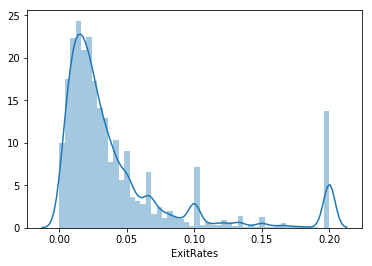

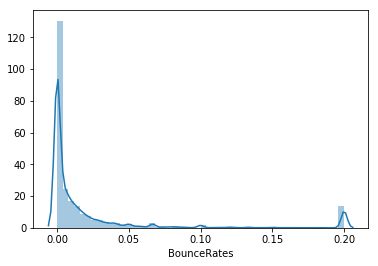

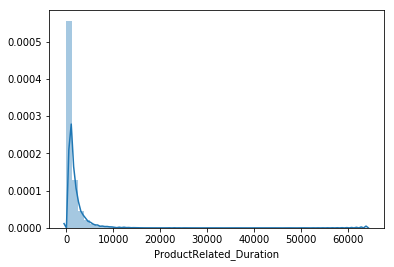

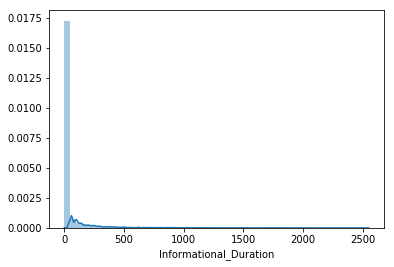

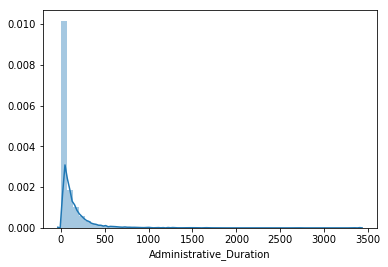

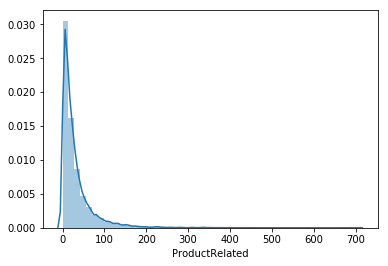

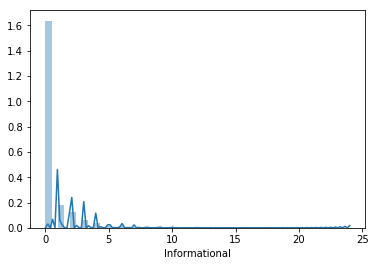

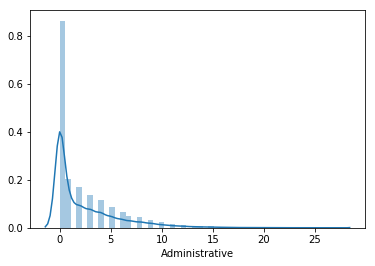

In [65]:
# Distribution of ExitRates
exhit_dist = sns.distplot(df['ExitRates'].dropna())
plt.show()

# Distribution of BounceRates
bounce_dist = sns.distplot(df['BounceRates'].dropna())
plt.show()

# Distribution of ProductRelated_Duration
productduration_dist = sns.distplot(df['ProductRelated_Duration'].dropna())
plt.show()

# Distribution of Informational_Duration
informationalduration_dist = sns.distplot(df['Informational_Duration'].dropna())
plt.show()

# Distribution of Administrative_Duration
administrative_dist = sns.distplot(df['Administrative_Duration'].dropna())
plt.show()

# Distribution of ProductRelated
productrelated_dist = sns.distplot(df['ProductRelated'].dropna())
plt.show()

# Distribution of Informational
informational_dist = sns.distplot(df['Informational'].dropna())
plt.show()

# Distribution of Administrative
administrative_dist = sns.distplot(df['Administrative'].dropna())
plt.show()



### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice. Answer this question for each of the tasks 2 and 3.

For task 2, the purpose of the clustering model is to profile customers based on the time they spend on the website. We will include Administrative Duration, Informational Duration and Product Related Duration variables. These variables measure the total time spent in each of these page categories.

For task 3, More information such as where the users come from and when they access the website will be included in the clustering analysis. We will also include Region, SpecialDay, Month and Weekend in spite of variables mentioned in task 2. 

## Task 2. The first clustering  model

### 1. Build a clustering model

In [72]:
# take 3 variables and drop the rest
df_time = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# convert df_time to matrix
X_time = df_time.as_matrix()

Elbow method is used to set the K value. In this method, a plot is draw between the k values and the clustering error. The main idea of elbow method is to find K ath which the error decreases abruptly. 

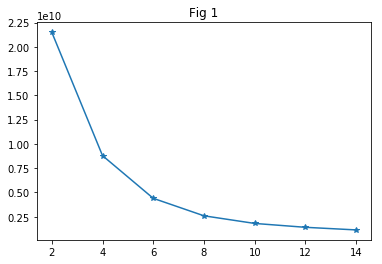

In [83]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X_time)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title("Fig 1")
plt.show()

#### 1.a What is the optimal number of clusters?

silhouette_score returns mean silhouette score of 0.67 for k = 4, 0.60 for k = 6 and 0.55 for k =8. This shows cluster in k = 4 are more appropriately matched to its own cluster then k = 6. Therefore, we choose k=4 as the optimal k.

In [85]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_time, clusters[1].predict(X_time)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_time, clusters[2].predict(X_time)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X_time, clusters[3].predict(X_time)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.6756725153907204
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.6091859121445686
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.5595425112426197


Cluster membership
2    9696
0    2240
1     337
3      10
Name: Cluster_ID, dtype: int64


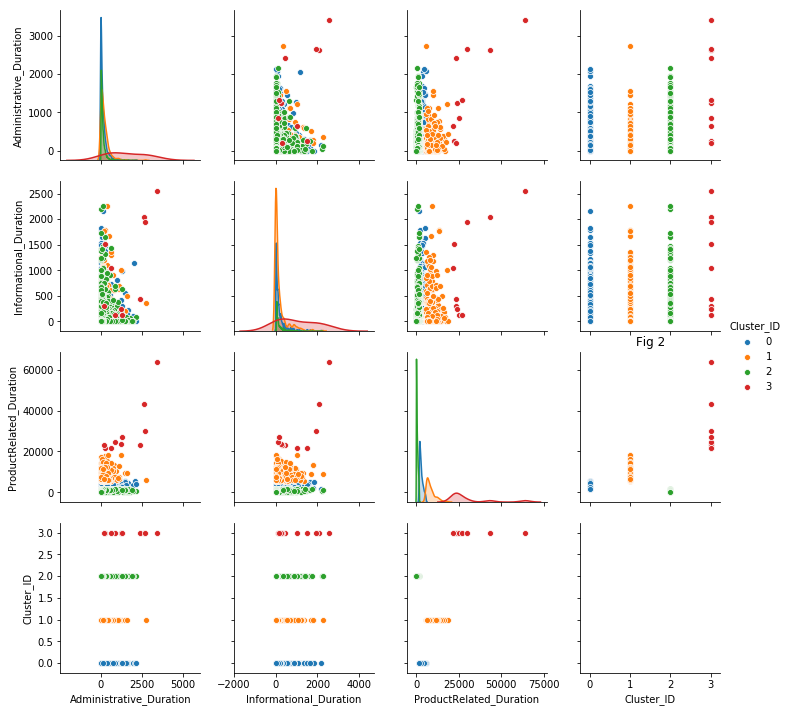

In [87]:
# make a model with optimal clusters
model = KMeans(n_clusters=4, random_state=42, n_jobs=10).fit(X_time) 
y = model.predict(X_time) # Make a prediction
df_time['Cluster_ID'] = y # Save it

# how many records are in each cluster
print("Cluster membership")
print(df_time['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_time, hue='Cluster_ID')
plt.title('Fig 2')
plt.show()

#### 1b. For the model with the optimal number of clusters, list the variables that were found important in determining the clusters?

K-means clustering does not weigh features, all features are equally important.

##### 1c. Explain the cluster results.

### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

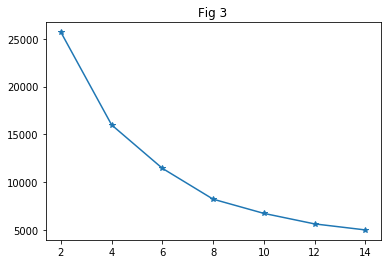

In [102]:
# Do it again but scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X_time)

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title('Fig 3')
plt.show()


In [103]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.6520435473596444
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.532338293047659
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.558193853434576


By using the standalization method, the optimal k is 4.

Cluster membership
1    10657
0     1024
3      420
2      182
Name: Cluster_ID, dtype: int64


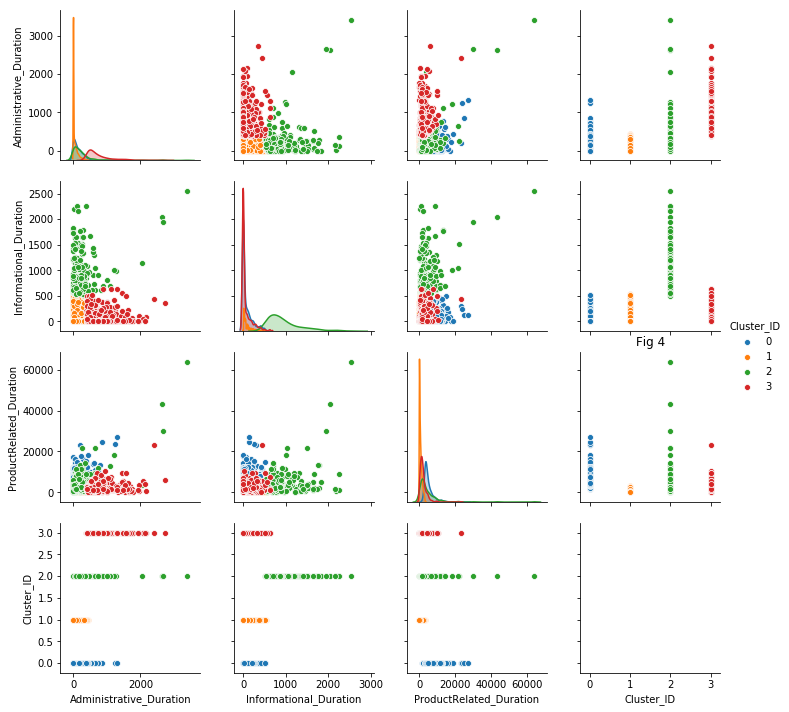

In [104]:
# make a model with optimal clusters
model = KMeans(n_clusters=4, random_state=42, n_jobs=10).fit(X) 
y = model.predict(X) # Make a prediction
df_time['Cluster_ID'] = y # Save it

# how many records are in each cluster
print("Cluster membership")
print(df_time['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_time, hue='Cluster_ID')
plt.title('Fig 4')
plt.show()

### 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label and a brief description.

## Task 3. Refining the clustering model

### 1. Add more information such as where the users come from and when they access the website, to the clustering analysis

In [105]:
df_Refine = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Region', 'SpecialDay', 'Month', 'Weekend']]
X_refine = df_Refine.as_matrix() # Make a matrix


#### 1a. What is the optimal number of clusters?

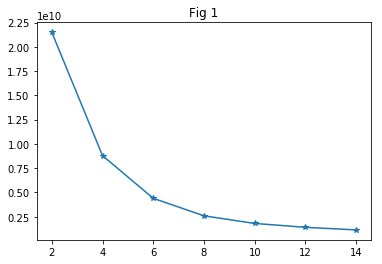

In [106]:
#list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X_refine)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title("Fig 1")
plt.show()

In [107]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_refine, clusters[1].predict(X_refine)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_refine, clusters[2].predict(X_refine)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X_refine, clusters[3].predict(X_refine)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.6756340194489715
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.6091026894572769
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.5593946024804805


silhouette_score returns mean silhouette score of 0.67 for k = 4, 0.60 for k = 6 and 0.55 for k =8. This shows cluster in k = 4 are more appropriately matched to its own cluster then k = 6. Therefore, we choose k=4 as the optimal k.

Cluster membership
2    9696
0    2240
1     337
3      10
Name: Cluster_ID, dtype: int64


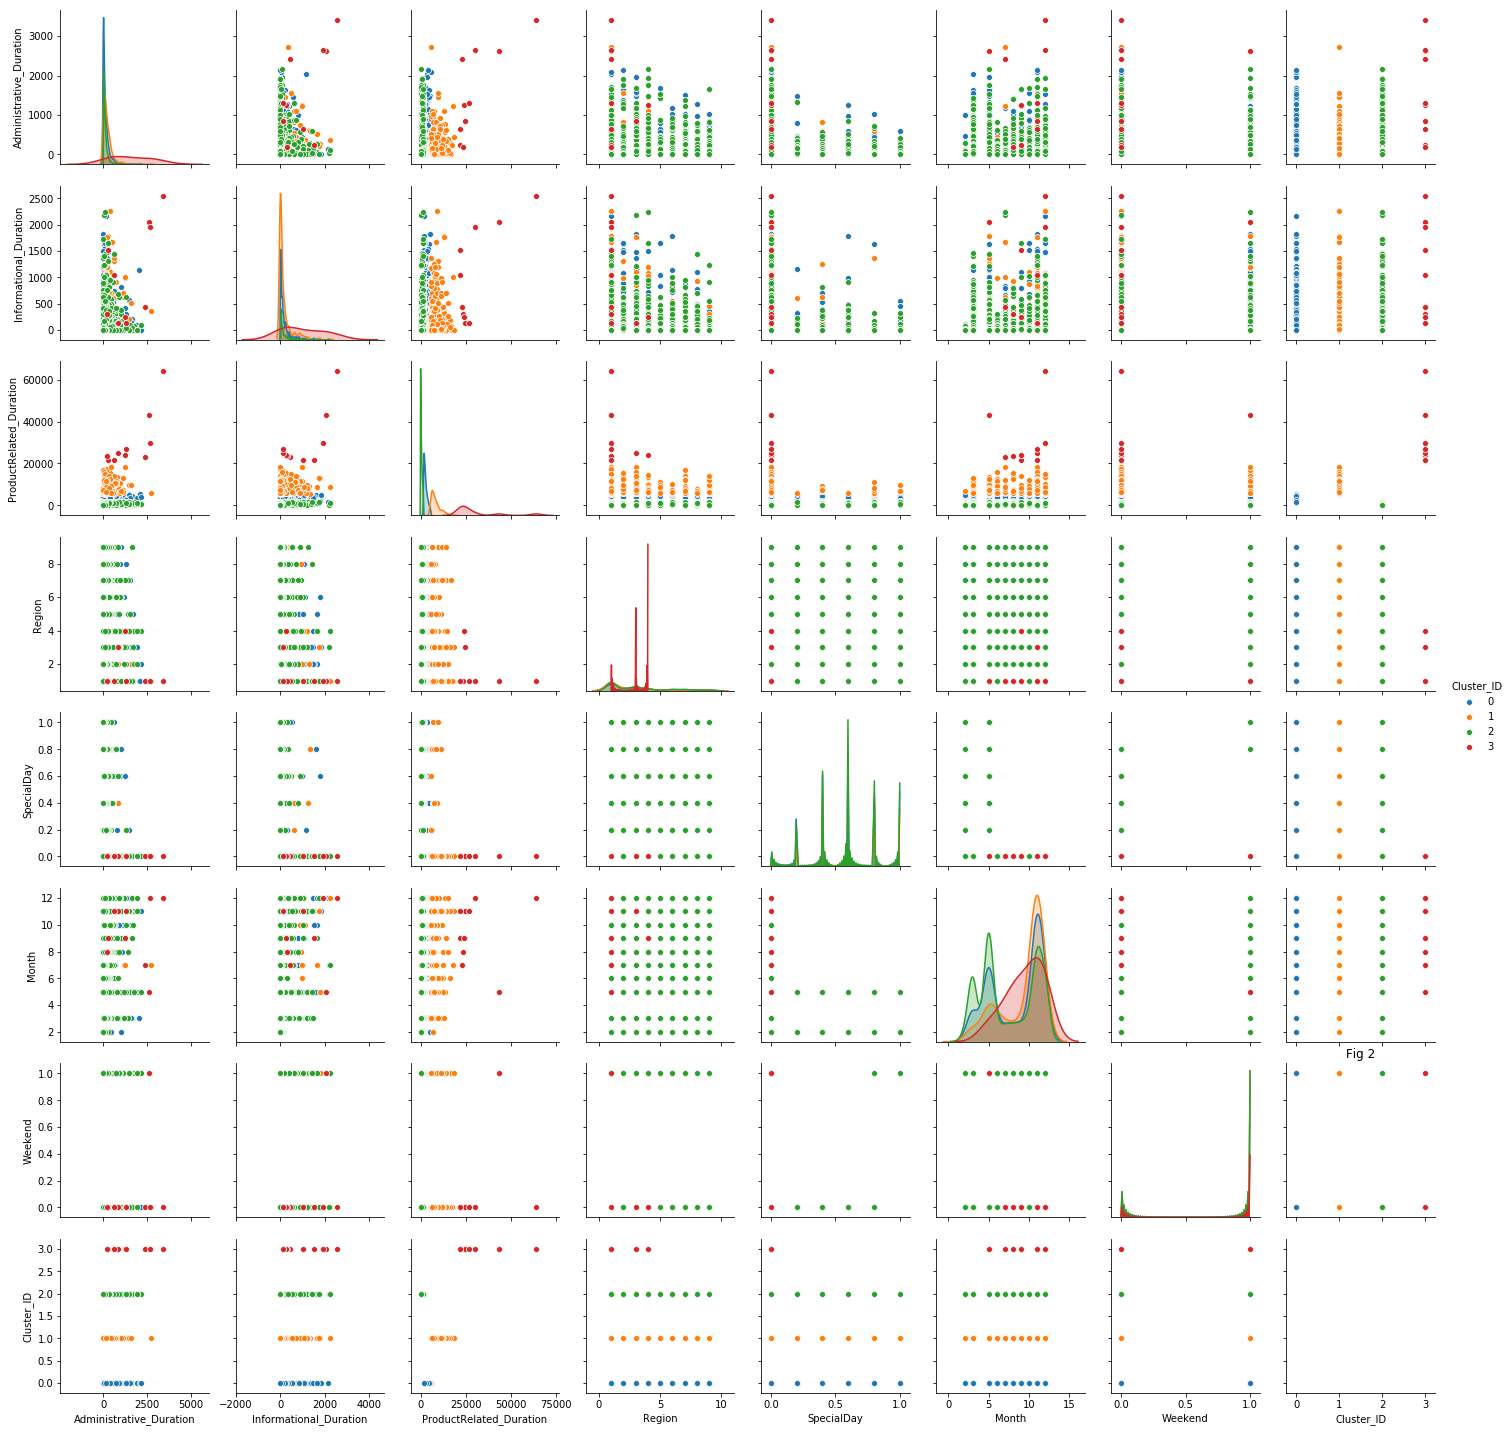

In [108]:
# make a model with optimal clusters
model = KMeans(n_clusters=4, random_state=42, n_jobs=10).fit(X_refine)
y = model.predict(X_refine) # Make a prediction
df_Refine['Cluster_ID'] = y # Save it

# how many records are in each cluster
print("Cluster membership")
print(df_Refine['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_Refine, hue='Cluster_ID')
plt.title('Fig 2')
plt.show()

#### 1b. Whether this model has different variable importance than the previous model (Task 2.1)? 

Yes, the model not only contains durational data, but also differnt Region, SpecialDay, Month and Weekend data. This means that variables introduced later may play a more important role than the durational attributes.

Kmeans weights all variables the same????

#### 1c. Explain the cluster results

### 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

#Its clear comparing the pair plots from the normalised and the non-normalised versions that there are much better and clearer groupings in the normalised version. This grouping becomes abundantly clear for variables such as Region, Month and Weekend.

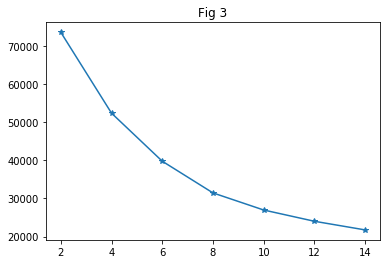

In [111]:
# Do it again but scale the data
scaler = StandardScaler()
X_Refine = scaler.fit_transform(X_refine)

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X_Refine)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.title('Fig 3')
plt.show()

In [112]:
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_Refine, clusters[1].predict(X_Refine)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_Refine, clusters[2].predict(X_Refine)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X_Refine, clusters[3].predict(X_Refine)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.32070408927961597
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.3077258656873589
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.3356370284005496


Cluster membership
5    3239
0    2874
1    2430
2    1836
3    1022
7     450
4     262
6     170
Name: Cluster_ID, dtype: int64


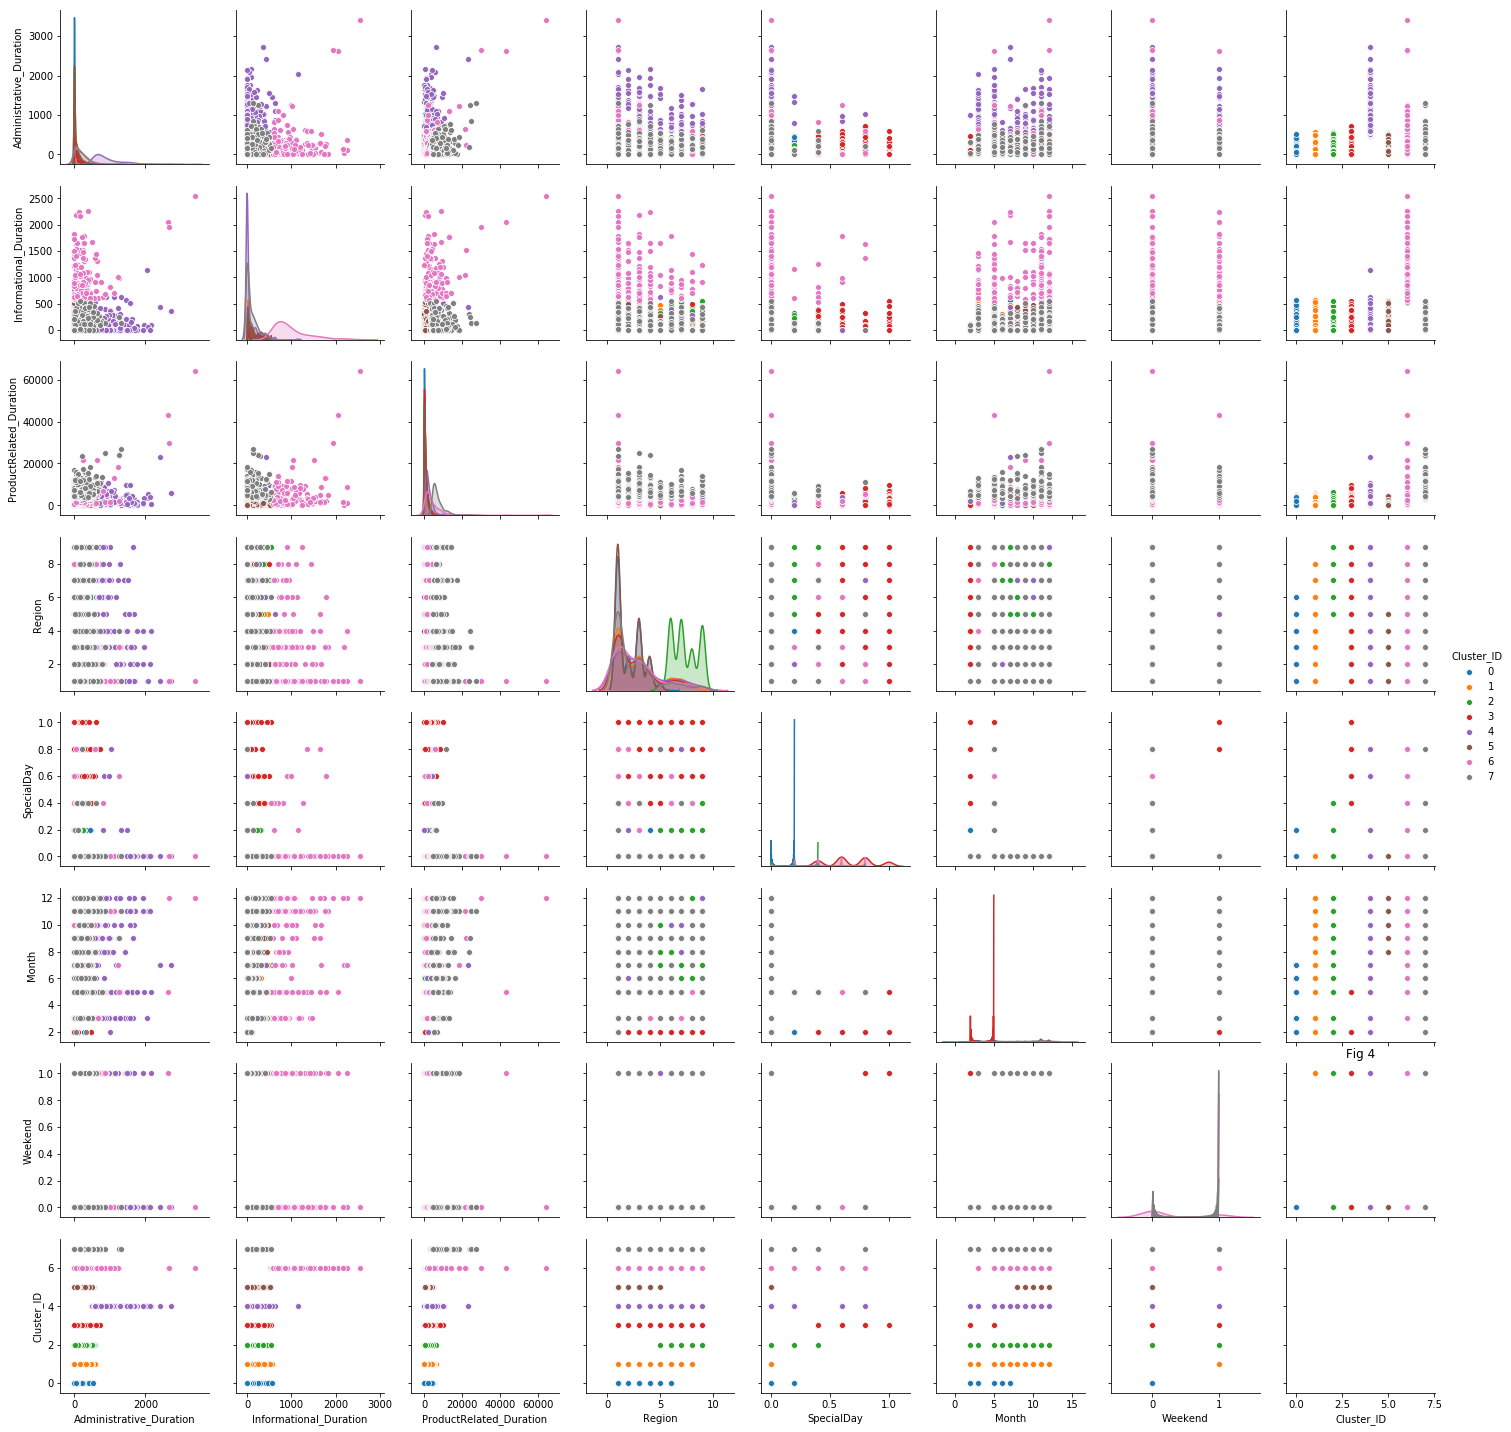

In [116]:
model = KMeans(n_clusters=8, random_state=42, n_jobs=10).fit(X_Refine) # make a model with optimal clusters
y = model.predict(X_Refine) # Make a prediction
df_Refine['Cluster_ID'] = y 

# how many records are in each cluster
print("Cluster membership")
print(df_Refine['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_Refine, hue='Cluster_ID')
plt.title('Fig 4')
plt.show()

### 3. Can you highlight the differences between the two clustering solutions (Tasks 2.1& 3.1) focusing on cluster interpretation? In other words, explain what is the effect of adding other variables in the clustering analysis?

#### Decision Making: Finally, could you detail - how the outcome of clustering analysis can be used by decision makers?